In [1]:
import os, sys
from pprint import pprint
import matplotlib.pyplot as plt
plt.style.use('ggplot')

for module in ['actions', 'models']:
    path = os.path.join(os.getcwd(), '..', module)
    sys.path.append(os.path.abspath(path))

from oracle import oracle
from inference import plot
from lstm_fixed import train_fixed
from load_data import load_data, prune

In [2]:
train_trials, eval_trials, test_trials = load_data('danny', ['branson','eric', 'mattia', 'nicolas'])

# accuracies of the best models for each input type
model_accuracies = []

In [3]:
def get_top_models(model_names, accuracies, parameters, top_n=10):
     # get indicies for top models
    top_indicies = sorted(range(len(accuracies)), key=lambda i: accuracies[i])[-top_n:]

    # get names for top models
    top_models = [model_names[i] for i in top_indicies]

    # get accuracies for top models
    top_accuracies = [accuracies[i] for i in top_indicies]

    # get params for top models
    top_parameters = [parameters[i] for i in top_indicies]

    tops = (list(zip(top_accuracies, top_parameters)))
    pprint(tops)

    return top_models[-1], top_accuracies[-1]

### Oracle

In [4]:
# Aaronson Oracle Accuracies for windows 4, 5, 6 for reference
window_sizes = [3, 4, 5, 6, 7]
oracle_results = oracle(window_sizes, test_trials, cutoff=True, logging=False)

window_size = 0
oracle_accuracy = 0

for w in window_sizes:
    if oracle_results[w]['accuracy'] > oracle_accuracy:
        window_size = w
        oracle_accuracy = oracle_results[w]['accuracy']

print(window_size, round(oracle_accuracy, 2))

4 60.03


### Binary

In [5]:
train_trials_binary = prune(train_trials, 'binary')
eval_trials_binary = prune(eval_trials, 'binary')
test_trials_binary = prune(test_trials, 'binary')

In [8]:
models = []
parameters = []
accuracies = []

for _ in range(30):
    model_name, params, accuracy = train_fixed(
        train_trials_binary, eval_trials_binary, test_trials_binary, 
        input_size=1, random='binary', logging=False
    )
    models.append(model_name)
    parameters.append(params)
    accuracies.append(accuracy)

top_binary_model, top_binary_acc = get_top_models(models, accuracies, parameters)
model_accuracies.append(top_binary_acc)

[(58.118388007739405,
  {'batch_size': 146,
   'hidden_size': 69,
   'input_size': 1,
   'learning_rate': 0.0072,
   'num_epochs': 3,
   'num_stacked_layers': 3,
   'segment_length': 6}),
 (58.17785266858029,
  {'batch_size': 66,
   'hidden_size': 63,
   'input_size': 1,
   'learning_rate': 0.0075,
   'num_epochs': 1,
   'num_stacked_layers': 1,
   'segment_length': 7}),
 (58.49575125021358,
  {'batch_size': 144,
   'hidden_size': 30,
   'input_size': 1,
   'learning_rate': 0.0273,
   'num_epochs': 1,
   'num_stacked_layers': 3,
   'segment_length': 8}),
 (58.80666147387734,
  {'batch_size': 98,
   'hidden_size': 68,
   'input_size': 1,
   'learning_rate': 0.0261,
   'num_epochs': 1,
   'num_stacked_layers': 1,
   'segment_length': 6}),
 (59.5033445427139,
  {'batch_size': 95,
   'hidden_size': 77,
   'input_size': 1,
   'learning_rate': 0.0117,
   'num_epochs': 1,
   'num_stacked_layers': 2,
   'segment_length': 8}),
 (59.56878092465482,
  {'batch_size': 111,
   'hidden_size': 46,
   

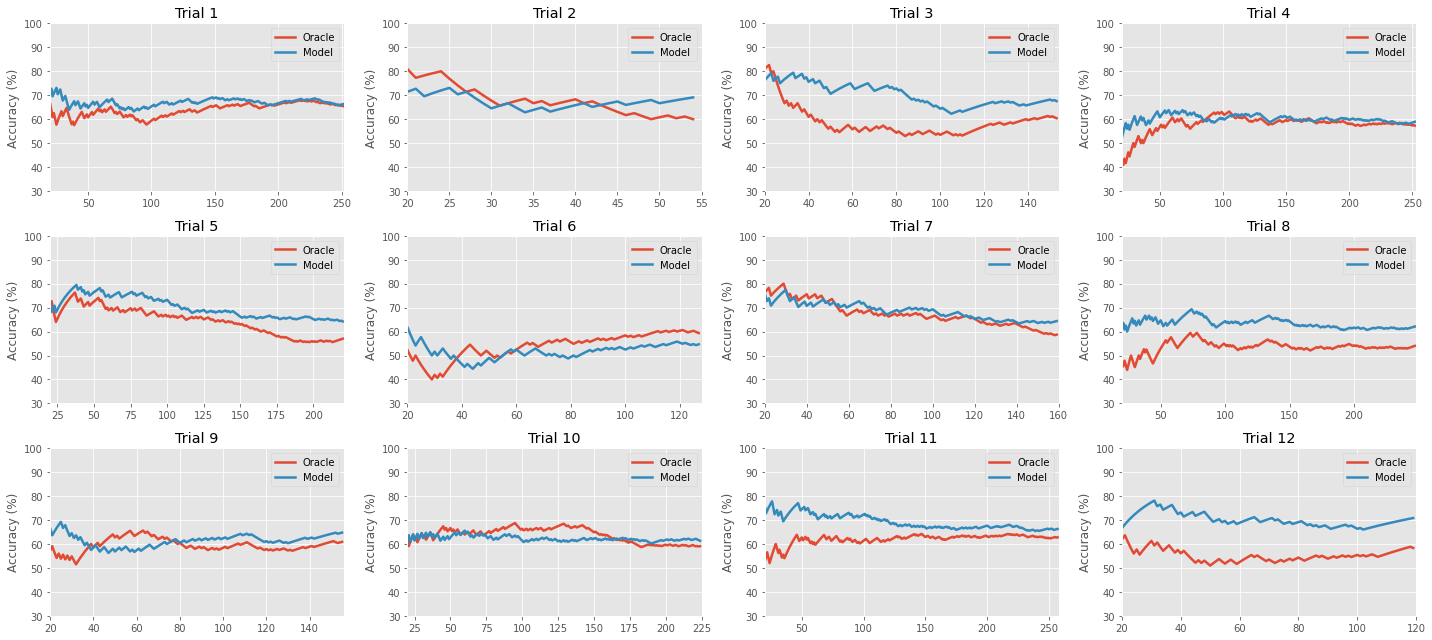

In [9]:
plot(test_trials, test_trials_binary, window_size, top_binary_model, cutoff=True)

### Delay

In [10]:
train_trials_delay = prune(train_trials, 'delay')
eval_trials_delay = prune(eval_trials, 'delay')
test_trials_delay = prune(test_trials, 'delay')

In [11]:
models = []
parameters = []
accuracies = []

for _ in range(30):
    model_name, params, accuracy = train_fixed(
        train_trials_delay, eval_trials_delay, test_trials_delay, 
        input_size=2, random='delay', logging=False,
    )
    models.append(model_name)
    parameters.append(params)
    accuracies.append(accuracy)

top_delay_model, top_delay_acc = get_top_models(models, accuracies, parameters)
model_accuracies.append(top_delay_acc)

[(56.96716618610263,
  {'batch_size': 129,
   'hidden_size': 55,
   'input_size': 2,
   'learning_rate': 0.0097,
   'num_epochs': 7,
   'num_stacked_layers': 1,
   'segment_length': 11}),
 (57.351246934636094,
  {'batch_size': 122,
   'hidden_size': 47,
   'input_size': 2,
   'learning_rate': 0.0048,
   'num_epochs': 5,
   'num_stacked_layers': 2,
   'segment_length': 8}),
 (57.80543846327284,
  {'batch_size': 127,
   'hidden_size': 44,
   'input_size': 2,
   'learning_rate': 0.0051,
   'num_epochs': 7,
   'num_stacked_layers': 2,
   'segment_length': 10}),
 (57.838183458626624,
  {'batch_size': 121,
   'hidden_size': 40,
   'input_size': 2,
   'learning_rate': 0.0059,
   'num_epochs': 6,
   'num_stacked_layers': 1,
   'segment_length': 9}),
 (57.9171293438606,
  {'batch_size': 112,
   'hidden_size': 53,
   'input_size': 2,
   'learning_rate': 0.0164,
   'num_epochs': 6,
   'num_stacked_layers': 2,
   'segment_length': 10}),
 (58.15214194006129,
  {'batch_size': 113,
   'hidden_size': 

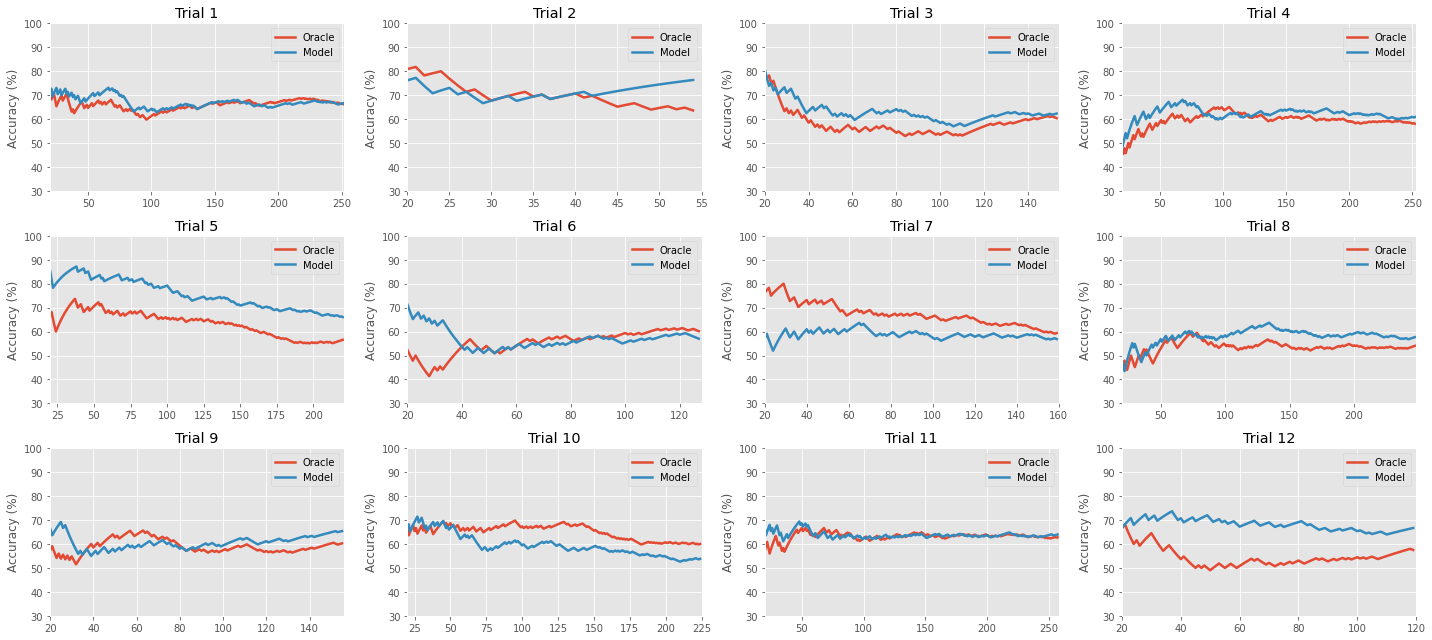

In [12]:
plot(test_trials, test_trials_delay, window_size, top_delay_model, cutoff=True)

### Pupils

In [13]:
train_trials_pupil = prune(train_trials, 'pupil')
eval_trials_pupil = prune(eval_trials, 'pupil')
test_trials_pupil = prune(test_trials, 'pupil')

In [14]:
models = []
parameters = []
accuracies = []

for _ in range(30):
    model_name, params, accuracy = train_fixed(
        train_trials_pupil, eval_trials_pupil, test_trials_pupil, 
        input_size=2, random='pupil', logging=False
    )
    models.append(model_name)
    parameters.append(params)
    accuracies.append(accuracy)

top_pupil_model, top_pupil_acc = get_top_models(models, accuracies, parameters)
model_accuracies.append(top_pupil_acc)

[(57.69811575560816,
  {'batch_size': 136,
   'hidden_size': 60,
   'input_size': 2,
   'learning_rate': 0.0038,
   'num_epochs': 7,
   'num_stacked_layers': 4,
   'segment_length': 10}),
 (57.719600655036196,
  {'batch_size': 129,
   'hidden_size': 53,
   'input_size': 2,
   'learning_rate': 0.0089,
   'num_epochs': 7,
   'num_stacked_layers': 3,
   'segment_length': 13}),
 (57.74383348605204,
  {'batch_size': 139,
   'hidden_size': 53,
   'input_size': 2,
   'learning_rate': 0.0103,
   'num_epochs': 5,
   'num_stacked_layers': 3,
   'segment_length': 13}),
 (57.93933369607578,
  {'batch_size': 124,
   'hidden_size': 58,
   'input_size': 2,
   'learning_rate': 0.0072,
   'num_epochs': 6,
   'num_stacked_layers': 2,
   'segment_length': 11}),
 (57.98480108489194,
  {'batch_size': 136,
   'hidden_size': 50,
   'input_size': 2,
   'learning_rate': 0.0119,
   'num_epochs': 5,
   'num_stacked_layers': 3,
   'segment_length': 12}),
 (58.02697132701925,
  {'batch_size': 119,
   'hidden_size'

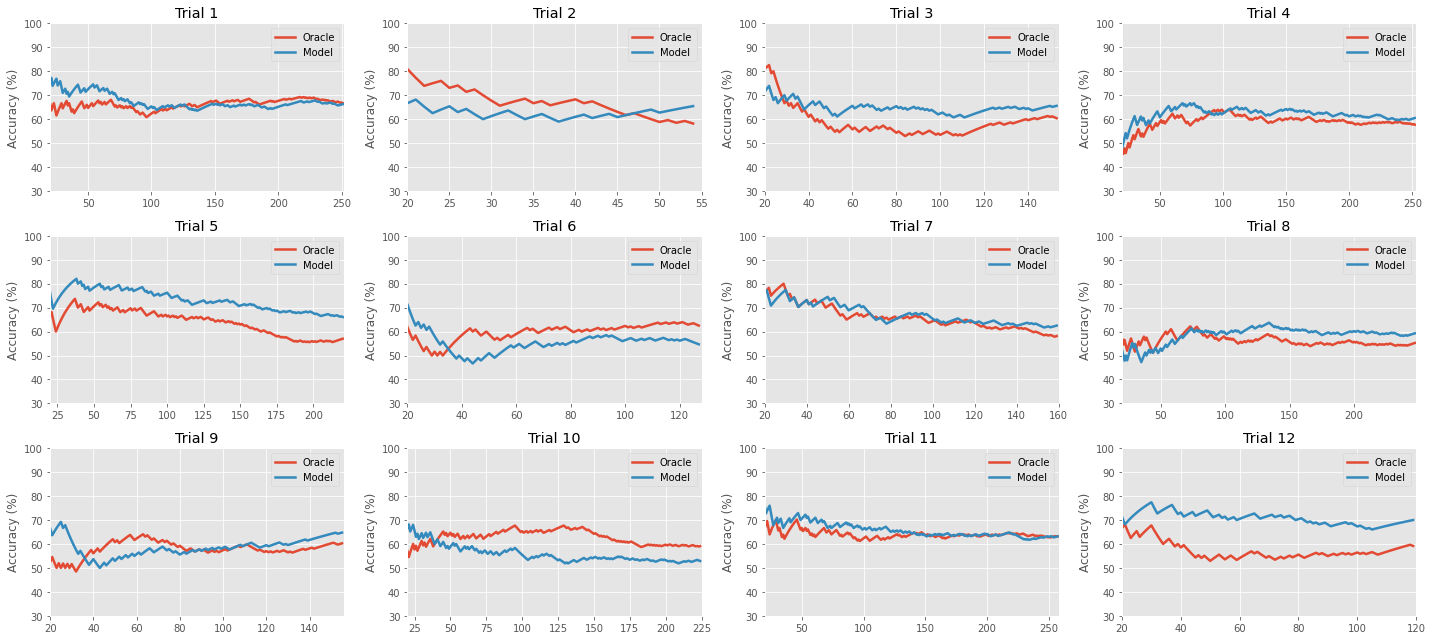

In [15]:
plot(test_trials, test_trials_pupil, window_size, top_pupil_model, cutoff=True)

### Delay + Pupil

In [16]:
models = []
parameters = []
accuracies = []

for _ in range(30):
    model_name, params, accuracy = train_fixed(
        train_trials, eval_trials, test_trials, 
        input_size=3, random='all', logging=False
    )
    models.append(model_name)
    parameters.append(params)
    accuracies.append(accuracy)

top_all_model, top_all_acc = get_top_models(models, accuracies, parameters)
model_accuracies.append(top_all_acc)

[(57.521735996989506,
  {'batch_size': 126,
   'hidden_size': 62,
   'input_size': 3,
   'learning_rate': 0.0056,
   'num_epochs': 6,
   'num_stacked_layers': 3,
   'segment_length': 10}),
 (57.52345852122271,
  {'batch_size': 124,
   'hidden_size': 49,
   'input_size': 3,
   'learning_rate': 0.0093,
   'num_epochs': 6,
   'num_stacked_layers': 3,
   'segment_length': 13}),
 (57.78697857046472,
  {'batch_size': 137,
   'hidden_size': 47,
   'input_size': 3,
   'learning_rate': 0.0145,
   'num_epochs': 5,
   'num_stacked_layers': 4,
   'segment_length': 12}),
 (57.86866200589167,
  {'batch_size': 101,
   'hidden_size': 52,
   'input_size': 3,
   'learning_rate': 0.0171,
   'num_epochs': 7,
   'num_stacked_layers': 3,
   'segment_length': 10}),
 (57.9634470539388,
  {'batch_size': 106,
   'hidden_size': 62,
   'input_size': 3,
   'learning_rate': 0.0092,
   'num_epochs': 7,
   'num_stacked_layers': 4,
   'segment_length': 12}),
 (57.97187828297106,
  {'batch_size': 132,
   'hidden_size':

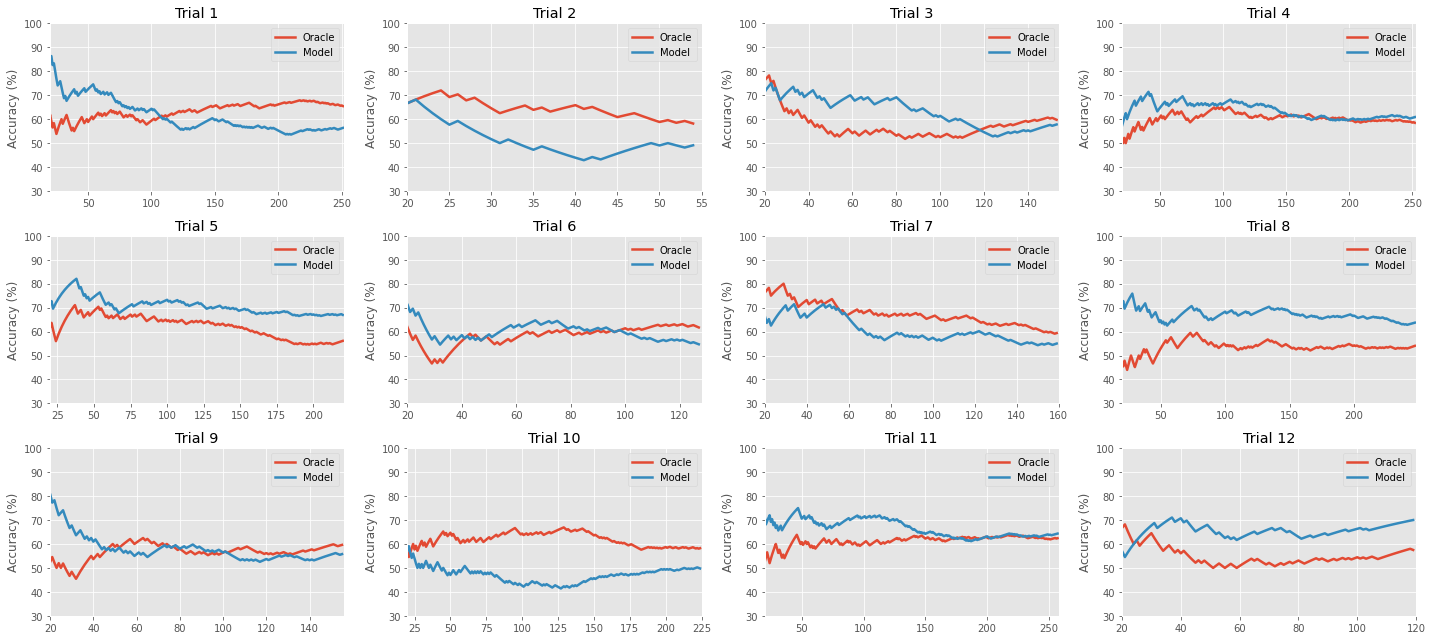

In [17]:
plot(test_trials, test_trials, window_size, top_all_model, cutoff=True)

### Plotting

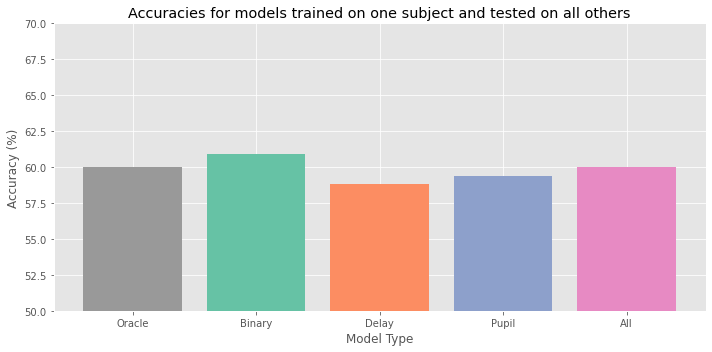

In [19]:
# use oracle accuracy and model accuracies to plot one bar chart of the results

plt.figure(figsize=(10, 5))
colors = ['#999999', '#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
plt.bar(['Oracle', 'Binary', 'Delay', 'Pupil', 'All'], [oracle_accuracy, *model_accuracies], color=colors)
plt.title('Accuracies for models trained on one subject and tested on all others')
plt.ylabel('Accuracy (%)')
plt.xlabel('Model Type')
plt.ylim(50, 70)
plt.tight_layout()
plt.savefig('plots/fixed_o2m.png')
plt.show()
